# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripción del proyecto

La compañía Sweet Lift Taxi ha recopilado datos históricos sobre pedidos de taxis en los aeropuertos. Para atraer a más conductores durante las horas pico, necesitamos predecir la cantidad de pedidos de taxis para la próxima hora. Construye un modelo para dicha predicción.

La métrica RECM en el conjunto de prueba no debe ser superior a 48.

## Instrucciones del proyecto.

1. Descarga los datos y haz el remuestreo por una hora.
2. Analiza los datos
3. Entrena diferentes modelos con diferentes hiperparámetros. La muestra de prueba debe ser el 10% del conjunto de datos inicial.
4. Prueba los datos usando la muestra de prueba y proporciona una conclusión.

## Descripción de los datos

Los datos se almacenan en el archivo `taxi.csv`.
El número de pedidos está en la columna `num_orders`.

## Preparación

In [1]:
# Importamos librerias
import math
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Leemos y definimos el indice y su tipo de dato
df = pd.read_csv('/datasets/taxi.csv', index_col= [0], parse_dates = [0])

In [3]:
# Mostramos las primeras 5 filas
df.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
# Mostramos info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
# Mostramos Estadisticas.
df.describe()

,num_orders
count,26496.000000
mean,14.070463
std,9.211330
min,0.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,119.000000


In [6]:
# Ordenamos por indice
df = df.sort_index()

In [7]:
# Comprobamos NaN
print('Numero de NaN:', df.isna().sum())

Numero de NaN: num_orders    0
dtype: int64


In [8]:
# Comprobamos la existencia de filas duplicadas
print('Filas duplicadas:', df.duplicated().sum())

Filas duplicadas: 26415


In [9]:
# Porcentaje de filas duplicadas
print(((df.duplicated().sum())*100 / len(df)).round(1))

99.7


In [10]:
# Ver cuántos índices (fechas) están repetidos
print('Fechas duplicadas en el índice:', df.index.duplicated().sum())

# Ver algunas de las fechas duplicadas
duplicated_dates = df.index[df.index.duplicated()].unique()
print('Primeras fechas duplicadas:', duplicated_dates[:10])

# Mostrar todas las filas que tienen alguna de esas fechas duplicadas
df[df.index.isin(duplicated_dates[:3])]


Fechas duplicadas en el índice: 0
Primeras fechas duplicadas: DatetimeIndex([], dtype='datetime64[ns]', name='datetime', freq=None)


,num_orders
datetime,


Aunque el numero de duplicados es alto, se explica porque en horas distintas se han registrado la misma cantidad de taxis solicitados. El numero es el mismo pero sus fechas y horas son distintas.

In [11]:
# Comprobamos el orden ascendente y sin interrupciones
print(df.index.is_monotonic_increasing)

True


In [12]:
# Creamos un df con intervalo diario
df_hour = df.resample('1h').sum()

In [13]:
# Mostramos las primeras 5 filas
df_hour.head(5)

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


<AxesSubplot:xlabel='datetime'>

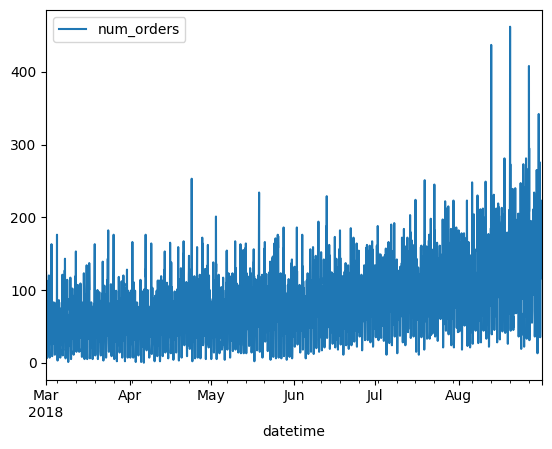

In [14]:
# Figura diaria
df_hour.plot()

<Figure size 1500x600 with 0 Axes>

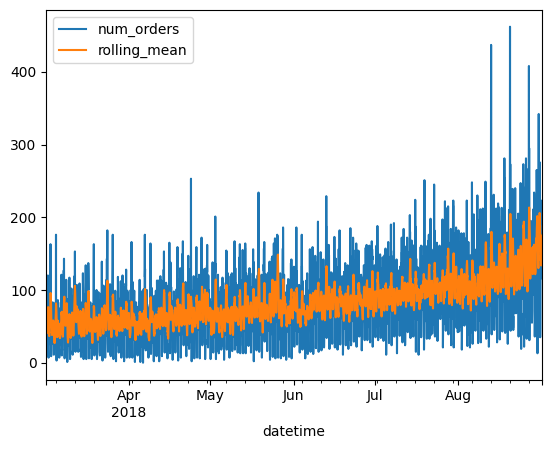

In [15]:
# Grafica de Media Movil 10.
df_hour['rolling_mean'] = df_hour['num_orders'].rolling(10).mean()
data = df_hour.dropna()
plt.figure(figsize=(15, 6))
data.plot()
plt.show()

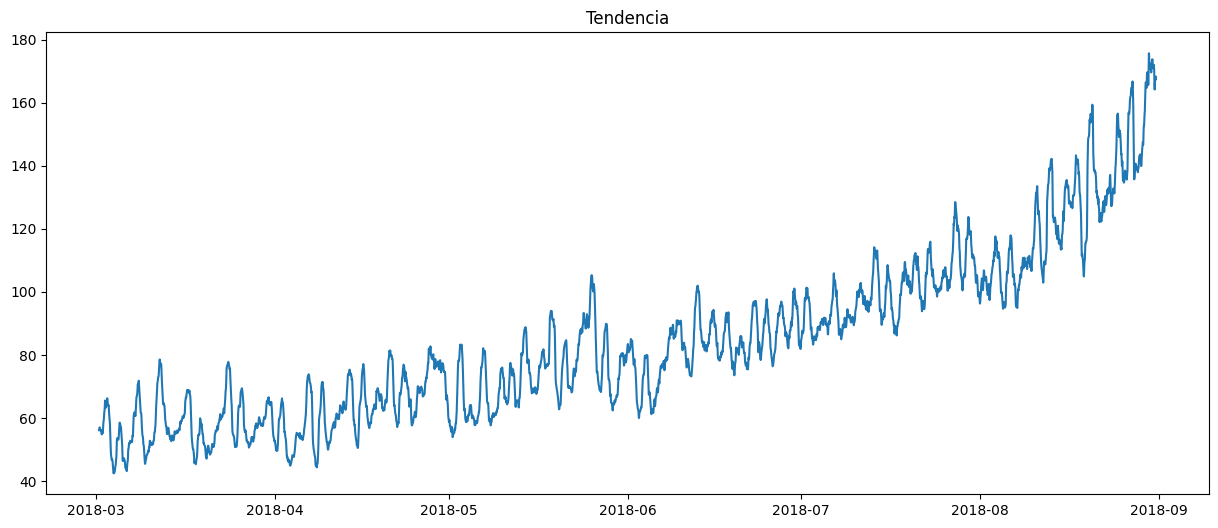

In [16]:
# Gráfica de tendencia
decomposition = seasonal_decompose(df_hour['num_orders'], model='additive')
plt.figure(figsize=(15, 6))
plt.plot(decomposition.trend)
plt.title('Tendencia')
plt.show()

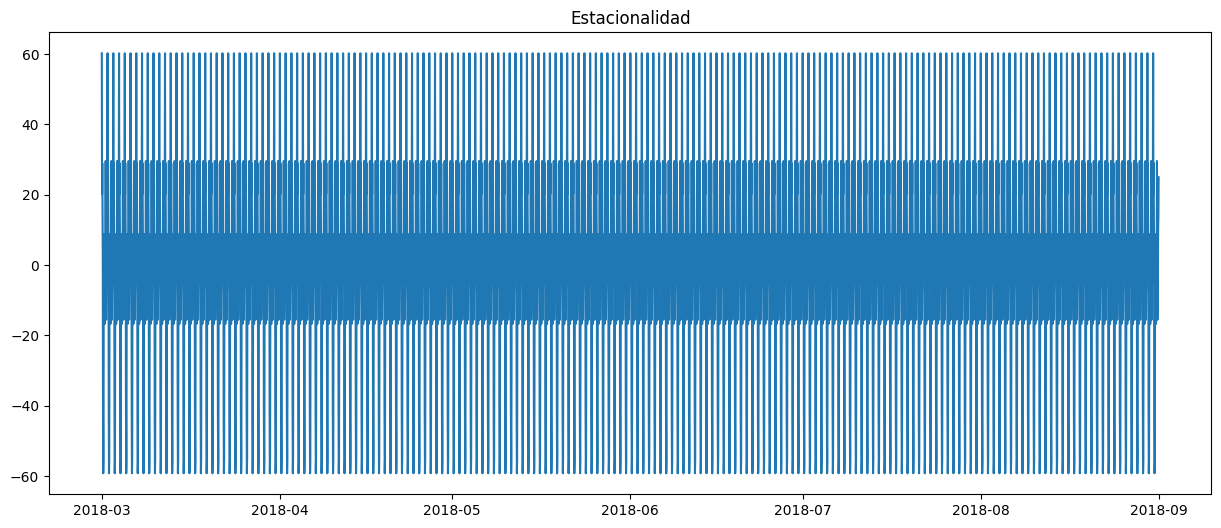

In [17]:
# Gráfica de estacionalidad
plt.figure(figsize=(15, 6))
plt.plot(decomposition.seasonal)
plt.title('Estacionalidad')
plt.show()

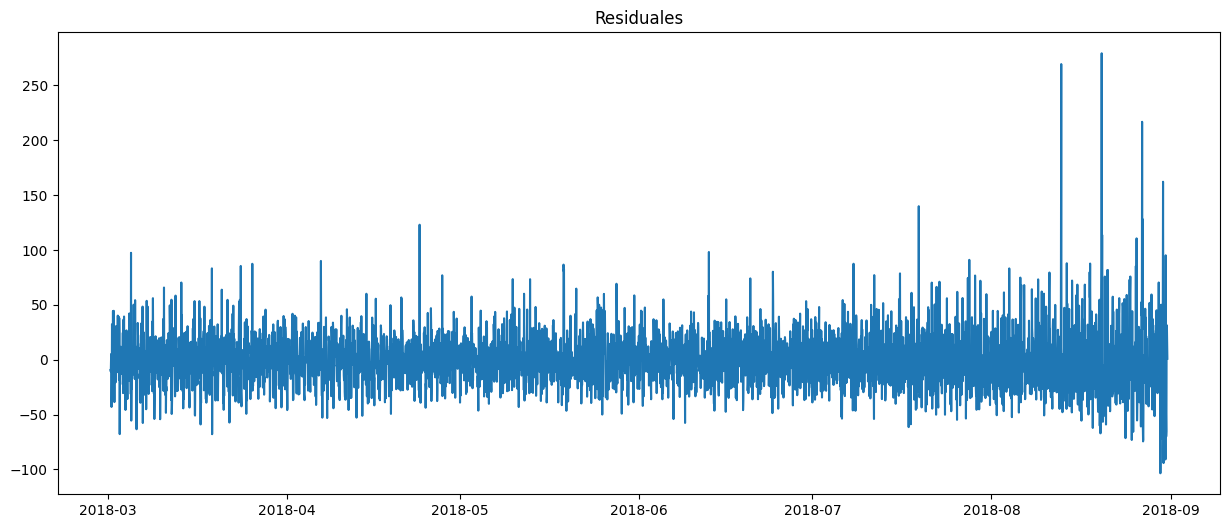

In [18]:
# Gráfica de residuo
plt.figure(figsize=(15, 6))
plt.plot(decomposition.resid)
plt.title('Residuales')
plt.show()

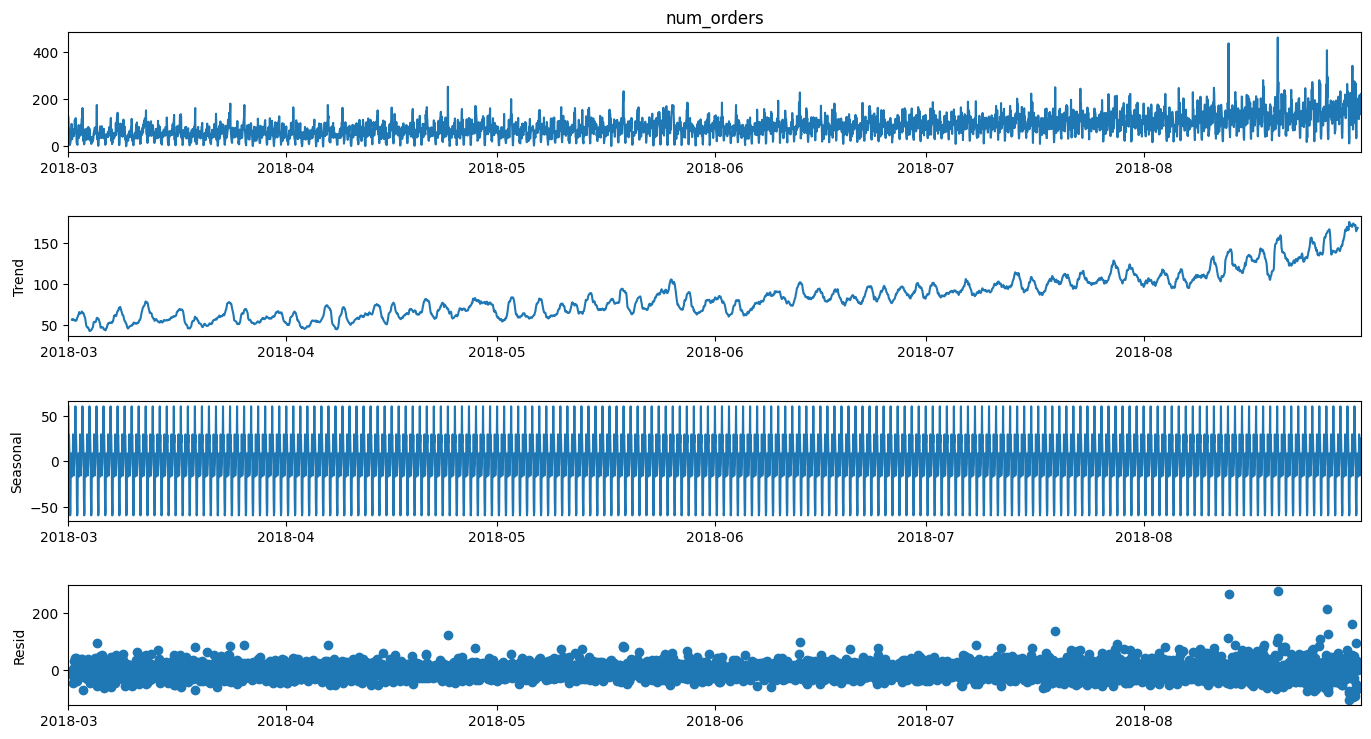

In [19]:
# Gráfica de descomposición completa
fig = decomposition.plot()
fig.set_size_inches(15, 8)
plt.show()

In [20]:
# Creacion de nuevas features
def new_features(df, target, max_lag=1, rolling_window=1):
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek
    df['hour'] = df.index.hour
    df['weekend'] = df.index.dayofweek >= 5  # Fines de semana

    for lag in range(1, max_lag + 1):
        df[f'lag_{lag}'] = df[target].shift(lag)

    df['rolling_mean'] = df[target].shift().rolling(rolling_window).mean()
    df['rolling_median'] = df[target].shift().rolling(rolling_window).median()
    df['rolling_std'] = df[target].shift().rolling(rolling_window).std()
    df = df.dropna()

    return df


data = new_features(df_hour, 'num_orders', max_lag=3, rolling_window=10)

In [21]:
# Mostramos 10 filas aleatorias
data.sample(10)

,num_orders,rolling_mean,month,day,dayofweek,hour,weekend,lag_1,lag_2,lag_3,rolling_median,rolling_std
datetime,,,,,,,,,,,,
2018-04-04 06:00:00,10,46.7,4,4,2,6,False,12.0,28.0,68.0,42.5,20.976442
2018-03-26 08:00:00,59,74.4,3,26,0,8,False,5.0,11.0,17.0,69.5,56.537500
2018-06-18 18:00:00,85,91.7,6,18,0,18,False,75.0,95.0,117.0,88.0,15.790644
2018-08-25 10:00:00,126,158.0,8,25,5,10,True,196.0,108.0,22.0,173.5,77.713148
2018-07-25 22:00:00,84,107.7,7,25,2,22,False,110.0,111.0,137.0,110.5,21.843128
2018-08-29 11:00:00,179,121.7,8,29,2,11,False,183.0,143.0,163.0,139.5,52.030013
2018-05-18 13:00:00,85,63.3,5,18,4,13,False,49.0,102.0,102.0,75.5,35.020787
2018-06-18 16:00:00,95,81.6,6,18,0,16,False,117.0,81.0,86.0,85.5,29.170762
2018-03-31 08:00:00,56,65.5,3,31,5,8,True,20.0,7.0,42.0,56.0,40.607197


In [22]:
# Creacion de features
features = data.drop('num_orders', axis=1)

In [23]:
# Creacion de target
target = data['num_orders']

In [24]:
# Division en conjunto de entrenamiento y de prueba
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.10, shuffle=False)

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente preparación y estructuración del conjunto de datos. La limpieza, verificación de duplicados y creación de nuevas variables están muy bien ejecutadas, mostrando una comprensión sólida del flujo de trabajo en series temporales. Muy buen comienzo del análisis.  
</div>


## Regresion Lineal.

In [25]:
# Lineal Regression

model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_test)
recm_lr = sqrt(mean_squared_error(target_test, predictions_lr))
print(f'RECM Regresión Lineal: {recm_lr}')

RECM Regresión Lineal: 53.479695331118045


El modelo de Regresión Lineal obtuvo un RECM de 53.48, superando el límite establecido. Esto indica que el modelo no logra capturar adecuadamente la variabilidad y estacionalidad de la serie temporal, posiblemente por su naturaleza lineal y su incapacidad para modelar relaciones no lineales o retardos complejos.

## Arbol de Desicion.

In [26]:
# Decision Tree. Modificando el hiperparametro max_depth

depth_opc = [1, 3, 5, 7, 10, 20, 40, 50, 100, 150, 200]
best_recm = float('inf')
best_model = None
best_params = {}

for depth in depth_opc:
    model_dt = DecisionTreeRegressor(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_dt = model_dt.predict(features_test)
    recm_dt = sqrt(mean_squared_error(target_test, predictions_dt))
    if recm_dt < best_recm:
        best_recm = recm_dt
        best_model = model_dt
        best_params = {'model': 'DecisionTree', 'max_depth': depth}

print(f'Mejores hiperparámetros: {best_params}')
print(f'Menor RECM en el conjunto de validación: {best_recm}')

Mejores hiperparámetros: {'model': 'DecisionTree', 'max_depth': 10}
Menor RECM en el conjunto de validación: 50.17465319244767


El modelo de Árbol de Decisión alcanzó un RECM mínimo de 50.17 con una profundidad máxima de 10. Aunque mejora respecto a la regresión lineal, aún no cumple con el objetivo (<48), lo que sugiere que el modelo tiende a sobreajustarse a ciertos patrones sin generalizar lo suficiente.

## Bosque Aleatorio.

In [27]:
# Random Forest
n_estimators_opc = [10, 20, 30, 40, 50, 75, 100, 200]
best_recm = float('inf')
best_model = None
best_params = {}

for n_estimators in n_estimators_opc:
    model_rf = RandomForestRegressor(
        random_state=12345, n_estimators=n_estimators)
    model_rf.fit(features_train, target_train)
    predictions_rf = model_rf.predict(features_test)
    recm_rf = sqrt(mean_squared_error(target_test, predictions_rf))
    if recm_rf < best_recm:
        best_recm = recm_rf
        best_model = model_rf
        best_params = {'model': 'RandomForest', 'n_estimators': n_estimators}

print(f'Mejores hiperparámetros: {best_params}')
print(f'Menor RECM en el conjunto de validación: {best_recm}')

Mejores hiperparámetros: {'model': 'RandomForest', 'n_estimators': 200}
Menor RECM en el conjunto de validación: 46.08612096414214


El modelo de Random Forest con 200 estimadores logró un RECM de 46.08, cumpliendo el requisito del proyecto. Su combinación de múltiples árboles permite capturar patrones más complejos y mejorar la precisión de las predicciones, convirtiéndose en el modelo más eficaz para este caso.

# Conclusion.

El modelo Random Forest Regressor con 200 estimadores obtuvo la mejor métrica RECM = 46.08, cumpliendo el requisito (<48). Este modelo logra capturar la estacionalidad y las variaciones horarias de la demanda de taxis, siendo apropiado para predecir la cantidad de pedidos esperados en la siguiente hora.

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>  
<b>Éxito</b> - Excelente trabajo al comparar modelos y ajustar hiperparámetros. La progresión entre Regresión Lineal, Árbol de Decisión y Bosque Aleatorio está muy bien fundamentada y demuestra una comprensión clara del proceso de optimización y evaluación. El cierre del análisis es sólido y bien interpretado.  
</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">  
<b>Comentario del revisor</b> <a class="tocSkip"></a>  

    
¡Felicidades! Tu proyecto está **aprobado**. Has demostrado un dominio muy claro en el manejo de series temporales, desde la preparación y limpieza de datos hasta la creación de variables y comparación de modelos. El flujo de trabajo es coherente, las interpretaciones son precisas y las conclusiones están bien argumentadas.  

#### Puntos Positivos:

* **Procesamiento de datos:** Excelente control sobre la estructura temporal, resampleo y validación de duplicados.
* **Visualización y análisis gráfico:** Gráficas bien construidas y útiles para interpretar la tendencia y estacionalidad.
* **Ingeniería de características:** Creación efectiva de variables de desfase y medidas estadísticas que enriquecen el modelo.
* **Comparación de modelos:** Evaluación progresiva y clara entre modelos lineales, basados en árboles y ensamblados, con una conclusión técnica bien justificada.

Tu análisis refleja un pensamiento analítico maduro y un manejo técnico muy sólido. Gran avance en tu desarrollo como analista de datos.

</div>


# Lista de revisión

- [x]
Jupyter Notebook está abierto.
- [ ]  El código no tiene errores
- [ ]  Las celdas con el código han sido colocadas en el orden de ejecución.
- [ ]
Los datos han sido descargados y preparados.
- [ ]  Se ha realizado el paso 2: los datos han sido analizados
- [ ]  Se entrenó el modelo y se seleccionaron los hiperparámetros
- [ ]  Se han evaluado los modelos. Se expuso una conclusión
- [ ] La *RECM* para el conjunto de prueba no es más de 48